Hi, this dataset contains top 500 films by production budget, as judged by The Numbers. In this project I want to analyze the relationship between genre and production cost. Whether among these Top500 movies, one genre generally costs more than others.
The author's own statement: "Production budgets are not inflation adjusted
Production budgets and box office numbers are hard to pin down specifically, as noted by The Numbers” So, I suppose it likes a playground dataset more.

In [30]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

First of all, read the file.

In [4]:
film_data = pd.read_csv('C:/Users/pc/Desktop/top-500-movies.csv', dtype=object)
film_data.head()

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007,PG-13,Action,4662,181,2019
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958,PG-13,Adventure,4164,136,2011
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109,PG-13,Action,4276,141,2015
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675,PG-13,Adventure,4134,136,2015
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183,PG-13,Action,4474,156,2018


A ha, we know there are several genres, I suppose the highest production-cost will come to 'Action' or 'Adventure', they remind me of Stallone, The Fast and the Furious or Indiana Jones. Before we analyze data formally, let's check the null data as preparation.

In [5]:
check = film_data.isnull().sum().sum()
check

70

In [21]:
change_data_type = {'production_cost':int}
film_data = film_data.astype(change_data_type)
pd.options.display.float_format = '{:.2f}'.format
film_data.dtypes

rank               object
release_date       object
title              object
url                object
production_cost     int32
domestic_gross     object
worldwide_gross    object
opening_weekend    object
mpaa               object
genre              object
theaters           object
runtime            object
year               object
dtype: object

We got 70 NaN data, let's check which value NaN has.

In [6]:
import numpy as np

In [14]:
check2 = film_data.isnull().stack()[lambda x:x].index.tolist()
def check(dfname):
    for element in check2:
        if element == 'production_cost':
            return True
        else:
            return False
        
check(check2)

False

After checking, we know that there is no null data in column "production_cost". Well done, let's continue.

Then, calculate the production cost based on the genre.

In [22]:
pro_count = film_data.groupby(['genre'])['production_cost'].sum().reset_index()
pro_count

,genre,production_cost
0,Action,31616800000.00
1,Adventure,32158100000.00
2,Black Comedy,350000000.00
3,Comedy,1302000000.00
4,Drama,3226800000.00
5,Horror,397000000.00
6,Musical,1225000000.00
7,Romantic Comedy,225000000.00
8,Thriller/Suspense,3095000000.00
9,Western,417000000.00


Here are 10 genres. Then, count the amount of films based on different genres.

In [23]:
count = film_data.groupby('genre').agg({"url":['count']}).rename(columns={'count':'count'})
merged = pd.merge(count, pro_count, on='genre')
merged.columns=['genre','count','production_cost']
merged

C:\Users\pc\AppData\Local\Temp\ipykernel_10416\4229036405.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged = pd.merge(count, pro_count, on='genre')


,genre,count,production_cost
0,Action,202,31616800000.00
1,Adventure,213,32158100000.00
2,Black Comedy,3,350000000.00
3,Comedy,11,1302000000.00
4,Drama,26,3226800000.00
5,Horror,3,397000000.00
6,Musical,8,1225000000.00
7,Romantic Comedy,2,225000000.00
8,Thriller/Suspense,24,3095000000.00
9,Western,3,417000000.00


I know that using "merge" is not the best way, cause the future warning, but I can't do better. This does not affect subsequent calculations, you know what these values represent. Here we got amount of films and the production cost of different genres.

In [26]:
merged['ave_cost'] = merged['production_cost'] / merged['count']
merged['rank'] = merged['ave_cost'].rank(ascending=0)
merged = merged.set_index('rank')
merged = merged.sort_index()
merged

,genre,count,production_cost,ave_cost
rank,,,,
1.00,Action,202,31616800000.00,156518811.88
2.00,Musical,8,1225000000.00,153125000.00
3.00,Adventure,213,32158100000.00,150976995.31
4.00,Western,3,417000000.00,139000000.00
5.00,Horror,3,397000000.00,132333333.33
6.00,Thriller/Suspense,24,3095000000.00,128958333.33
7.00,Drama,26,3226800000.00,124107692.31
8.00,Comedy,11,1302000000.00,118363636.36
9.00,Black Comedy,3,350000000.00,116666666.67


Atfer calculating, 'per' column used the scientific notation method, and there are many decimal places, I have adjusted. I also ranked them. Let's do visualization.

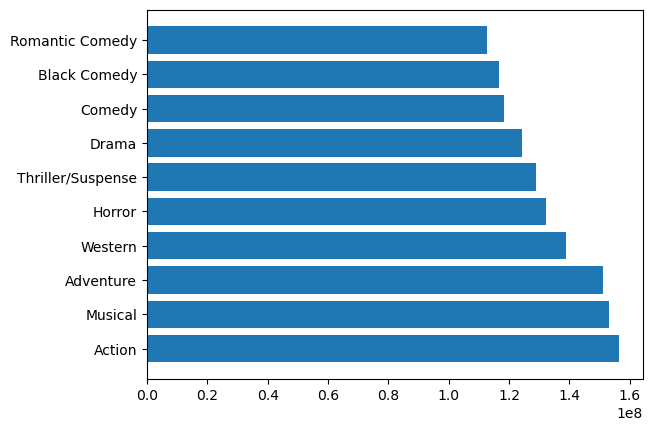

In [37]:
genre = list(merged['genre'])
ave_cost = list(merged['ave_cost'])
plt.barh(genre, ave_cost, tick_label=genre)
plt.show()

In conclusion, although the number of romantic comedies, westerns, horror films, and black comedies is the least, it seems to be very non-mainstream， the fact is that the production-cost of westerns and horror films is not low. 
The last three are Comedy, Black Comedy, and Romantic Comedy respectively, so it seems that the production cost of comedy is low in general.
As we expected, action films have the highest production-cost, and there may be a lot of special scenes and special effects that need to be produced.